<a href="https://colab.research.google.com/github/Samhitaa-DS/LOGISTIC-DEPLOYMENT/blob/main/ESTIMATION_AND_CONFIDENCE_INTERVAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INTRODUCTION**
In quality control, a confidence interval gives a range of values that likely contains the population mean, based on a sample.
For this study, a manufacturer of print-heads wants to estimate the mean durability (in millions of characters printed before failure) based on a sample of 15 print-heads.
Testing is destructive, so the sample is small.

We will compute two 99% confidence intervals:

Unknown population standard deviation (σ) → use t-distribution

Known population standard deviation (σ) → use z-distribution

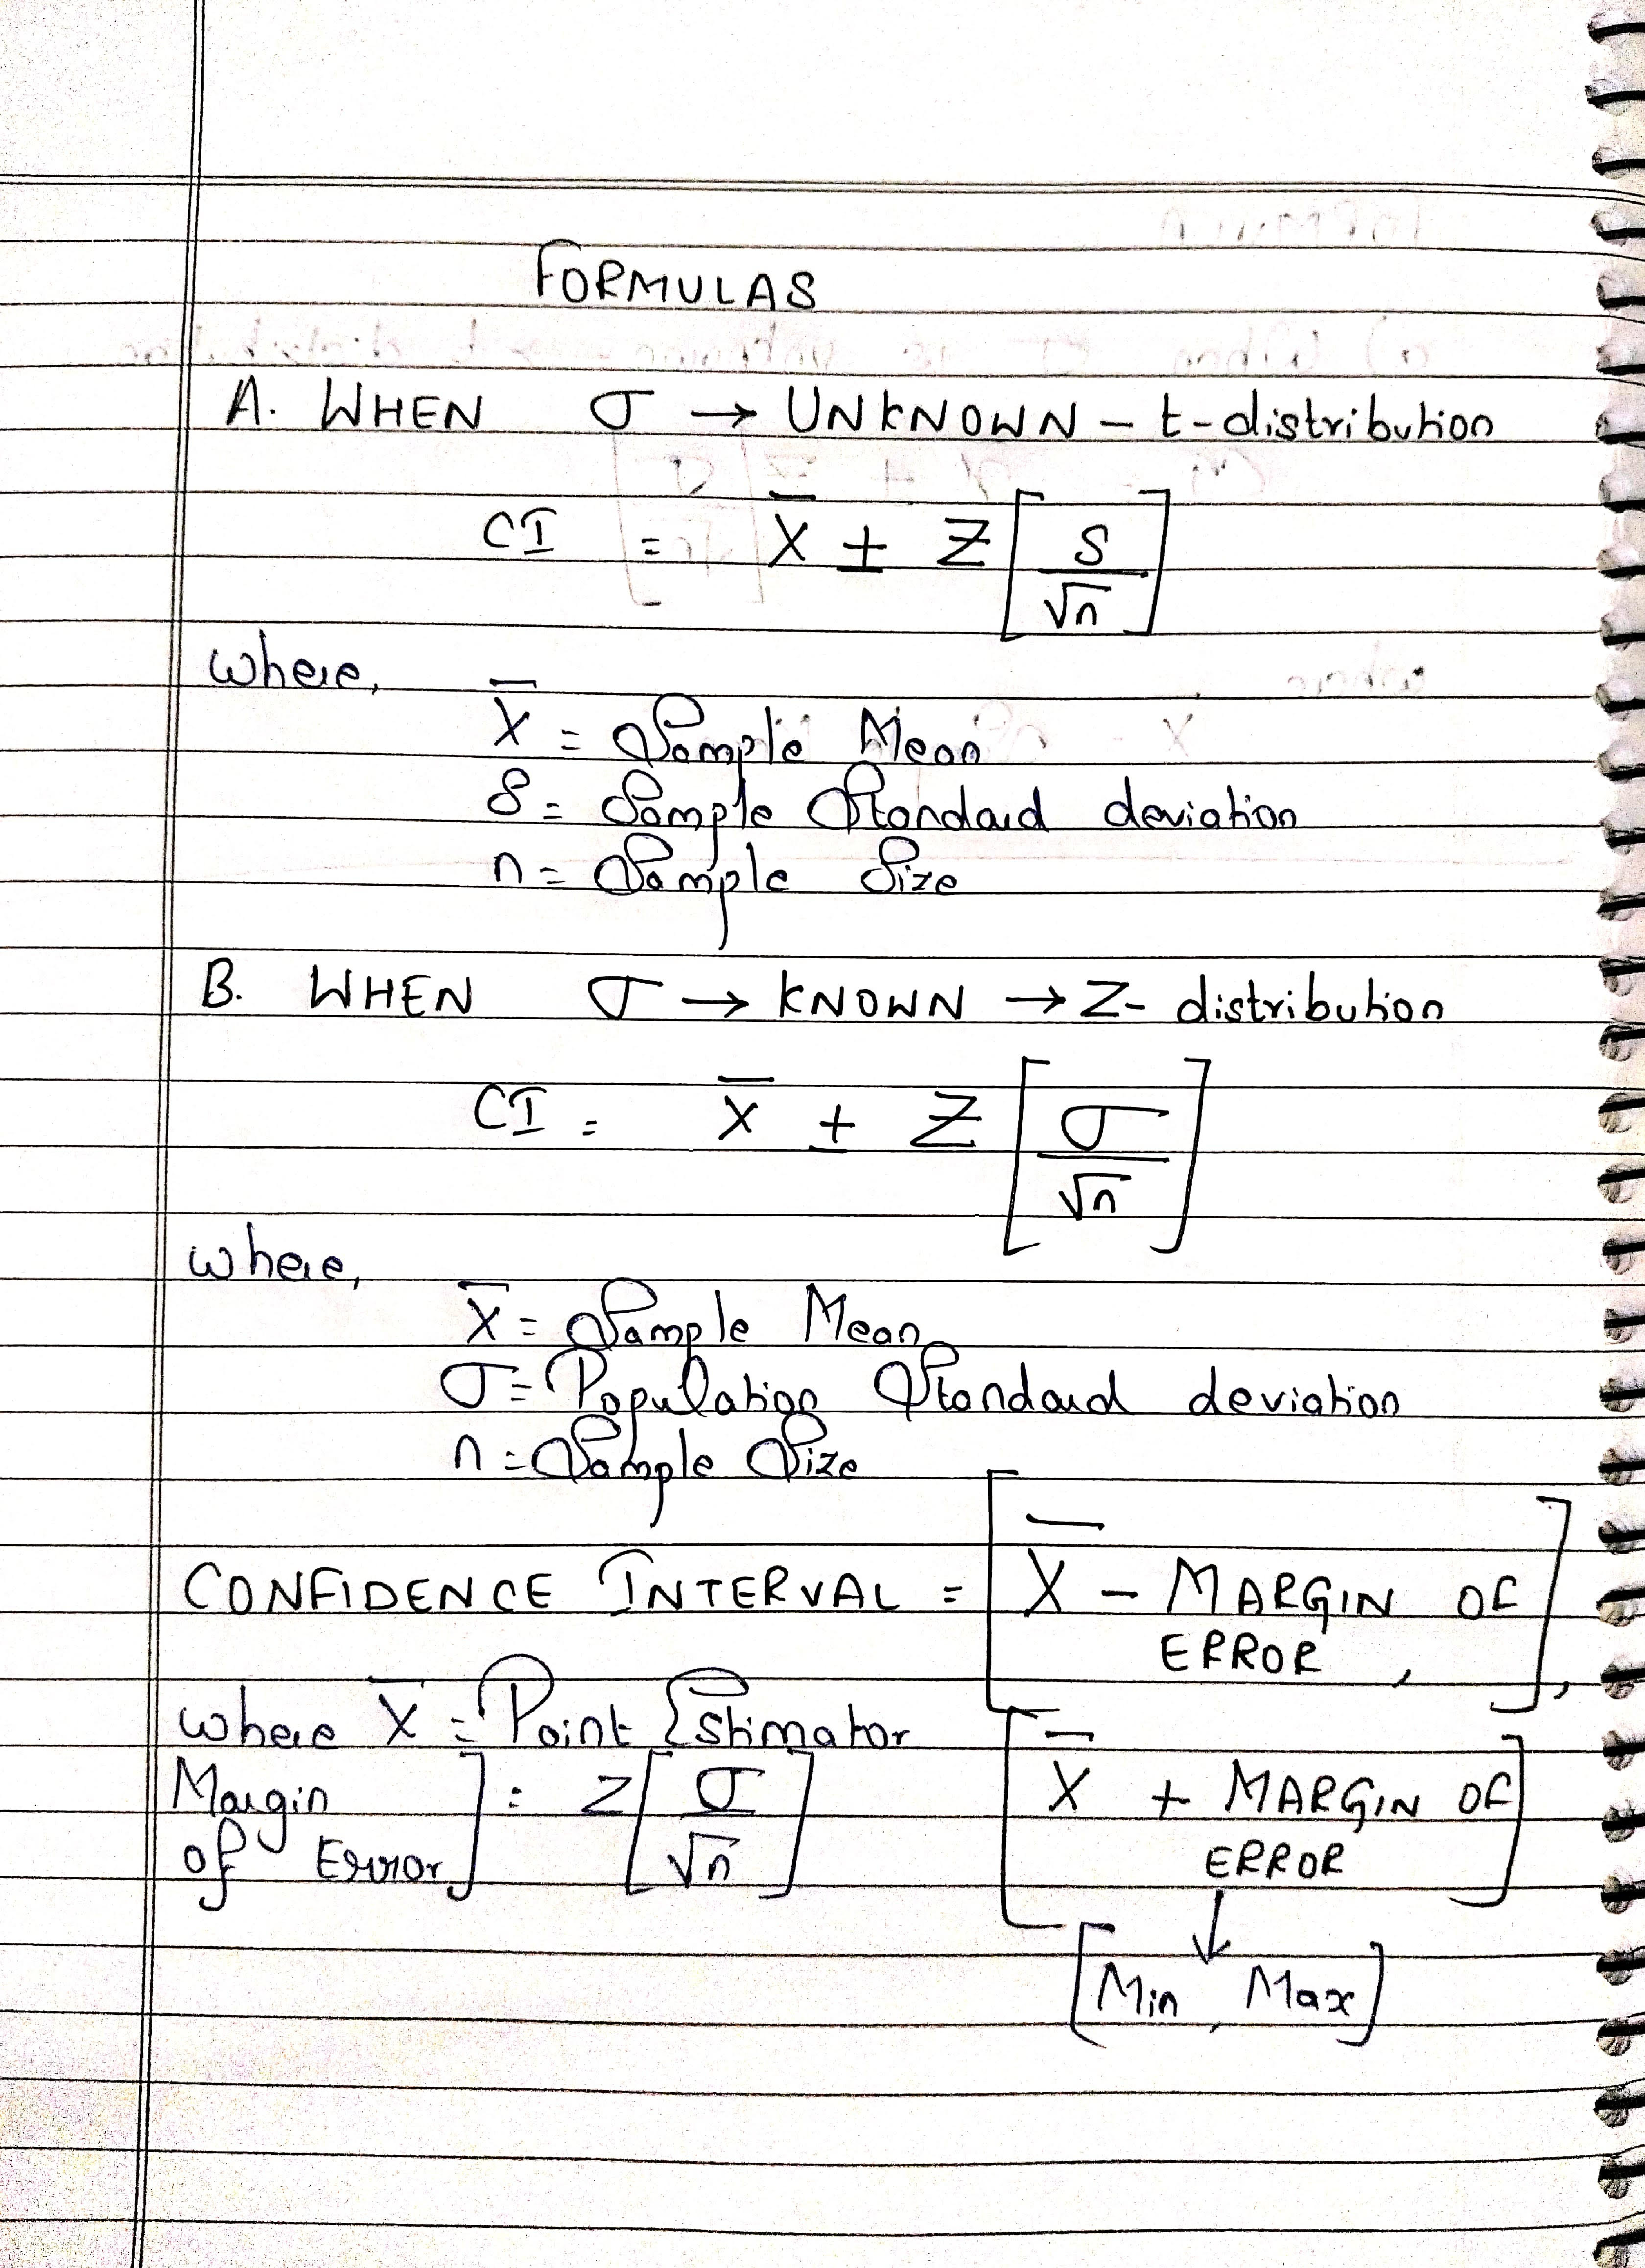

#**PYTHON CODING**

In [9]:
#Step-1 : Importing the Libraries
import numpy as np
from scipy import stats

#Step-2 : Input the data
data = np.array([
    1.13, 1.55, 1.43, 0.92, 1.25,
    1.36, 1.32, 0.85, 1.07, 1.48,
    1.20, 1.33, 1.18, 1.22, 1.29
])

#Step-3 : Calculating the basic statistics
n = len(data) # sample size
mean = np.mean(data) #sample mean
s = np.std(data, ddof=1) #sample standard deviation (ddof = Delta Degrees of Freedom--n-1)

#printing the results upto 5 decimal places
print(f"Sample size (n): {n}")
print(f"Sample mean (x̄): {mean:.5f}")
print(f"Sample std deviation (s): {s:.5f}")

Sample size (n): 15
Sample mean (x̄): 1.23867
Sample std deviation (s): 0.19316


In [13]:
#For UNKNOWN sigma - t-distribution
alpha = 0.01                         # for 99% confidence
df = n - 1                           # degrees of freedom
t_crit = stats.t.ppf(1 - alpha/2, df)  # t critical value
me = s / np.sqrt(n)                  #marginal error using sample std deviation
ci_t_min = mean - t_crit * me
ci_t_max = mean + t_crit * me

print("99% CI (t-distribution, unknown σ):")
print(f"Minimum: {ci_t_min:.3f}")
print(f"Maximum: {ci_t_max:.3f}")


99% CI (t-distribution, unknown σ):
Minimum: 1.090
Maximum: 1.387


In [15]:
#For KNOWN sigma - z-distribution
sigma = 0.2                          # given population standard deviation
z_crit = stats.norm.ppf(1 - alpha/2) # z critical value
me_known = sigma / np.sqrt(n)        # marginal error using known σ

ci_z_min = mean - z_crit * me_known
ci_z_max = mean + z_crit * me_known

print("99% CI (z-distribution, known σ=0.2):")
print(f"Minimum: {ci_z_min:.3f}")
print(f"Maximum: {ci_z_max:.3f}")

99% CI (z-distribution, known σ=0.2):
Minimum: 1.106
Maximum: 1.372


#**CONCLUSION**

From the calculations:

**Unknown sigma (t-distribution) → CI = (1.090, 1.387)**

**Known sigma = 0.2 (z-distribution) → CI = (1.106, 1.372)**

The t-distribution interval is slightly wider because we are estimating σ from the sample, which adds uncertainty.
When σ is known, the z-distribution produces a slightly narrower confidence interval.
In both cases, we are 99% confident that the true mean durability of the print-heads lies within these ranges.